In [26]:
# Import all necessary libraries.
import pandas as pd
from sklearn import datasets  
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [27]:
# Load flower dataset.
iris = datasets.load_iris()
features = pd.DataFrame(iris.data)
labels = pd.DataFrame(iris.target)
feature_names = iris.feature_names
target_names = iris.target_names

print(target_names)

['setosa' 'versicolor' 'virginica']


In [28]:
# Create classifier.
clf = DecisionTreeClassifier(criterion='entropy')

# Split data into training and testing datasets.
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Fit the classifier on the training features and labels
clf.fit(features_train, labels_train)

# Use the trained classifier to predict labels for the test features.
pred = clf.predict(features_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(labels_test, pred)

print('accuracy: ',accuracy)

accuracy:  1.0


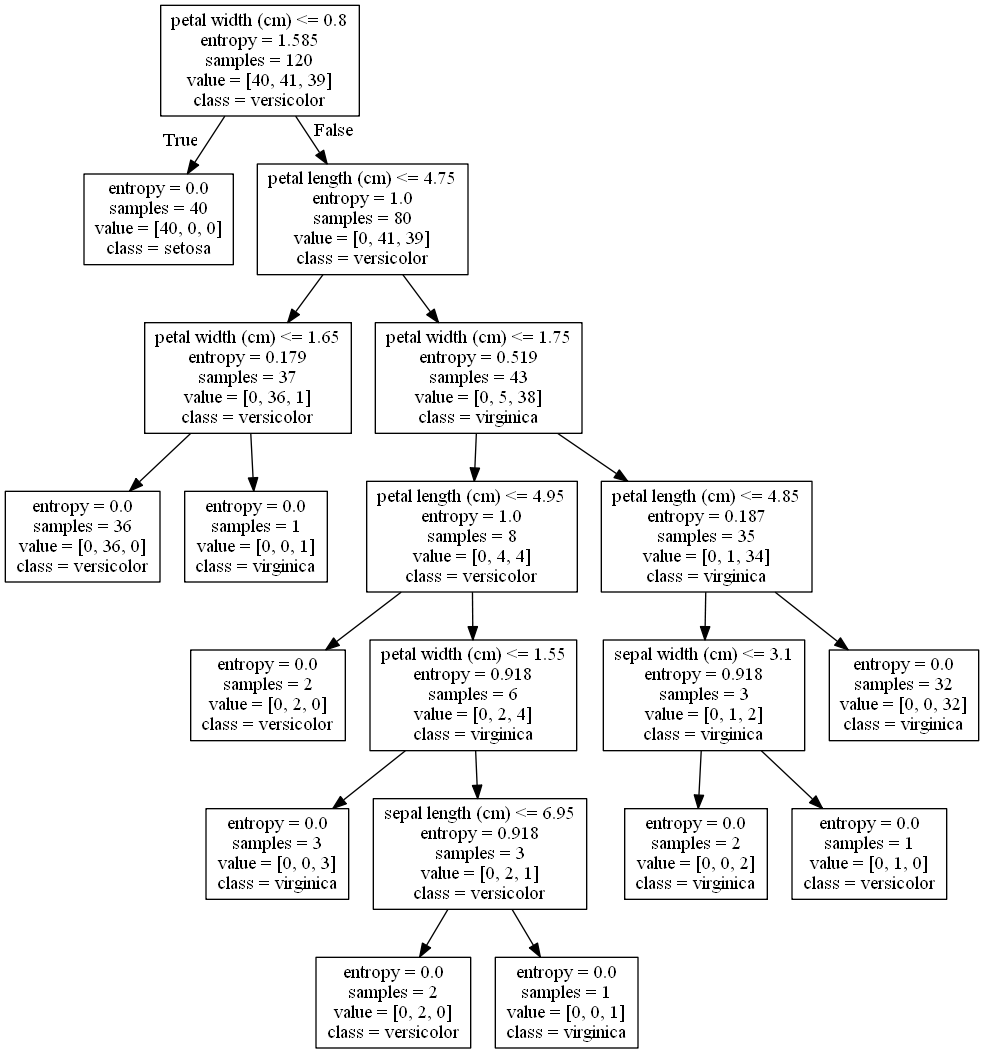

In [29]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, class_names=target_names, feature_names=feature_names)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

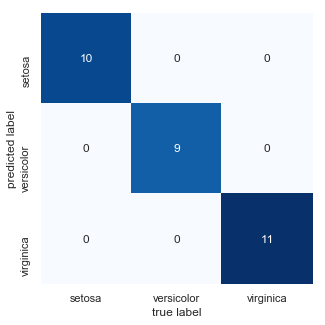

In [30]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(labels_test, pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names, yticklabels=target_names, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix_bc.png', dpi=600)
plt.show()

In [31]:
# Print classification report.
print(classification_report(labels_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

